https://colab.research.google.com/drive/1jzKUyEDHHd58DGcZRCL31zP0IsGElXjm?usp=sharing

# ARIMA Model

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget "https://www.dropbox.com/s/q2zm1avcj7e8938/final_data.csv"

--2021-04-10 15:47:20--  https://www.dropbox.com/s/q2zm1avcj7e8938/final_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/q2zm1avcj7e8938/final_data.csv [following]
--2021-04-10 15:47:20--  https://www.dropbox.com/s/raw/q2zm1avcj7e8938/final_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5f1d863170c4f9fe95fb0ed6ec.dl.dropboxusercontent.com/cd/0/inline/BMX1rSu1Z4cSh00hSg2Jbqqp3uoyLpcFHZlXPNRM7K3YjxTm22_ooPBoWzVmS658dlChWMKXPva0oX9DyTP5_G5WMi3a1Kaje9ohjThB52RX2PVgubdnipe9oM3-UrTks9Au8xDjL4a44xhA8ROWpBxl/file# [following]
--2021-04-10 15:47:21--  https://uc5f1d863170c4f9fe95fb0ed6ec.dl.dropboxusercontent.com/cd/0/inline/BMX1rSu1Z4cSh00hSg2Jbqqp3uoyLpcFHZlXPNRM7K3YjxTm22_ooPBoWzVmS658dlChWMKXPva0oX9DyTP5

In [ ]:
!ls

final_data.csv	final_data.csv.1  sample_data


In [ ]:
#Load Dataset
df = pd.read_csv("final_data.csv")

In [ ]:
#Explore the data
df.head()

Date  Sales
0  07-02-2020     88
1  07-03-2020     84
2  07-04-2020     85
3  07-05-2020     85
4  07-06-2020     84

In [ ]:
#Getting  information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    100 non-null    object
 1   Sales   100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
#Null entry
df.isnull().sum()

Date     0
Sales    0
dtype: int64

In [ ]:
#Summary Statistics
df.describe()

Sales
count  100.000000
mean   137.080000
std     39.999414
min     83.000000
25%     99.000000
50%    138.500000
75%    167.500000
max    228.000000

In [ ]:
df.head()

Date  Sales
0  07-02-2020     88
1  07-03-2020     84
2  07-04-2020     85
3  07-05-2020     85
4  07-06-2020     84

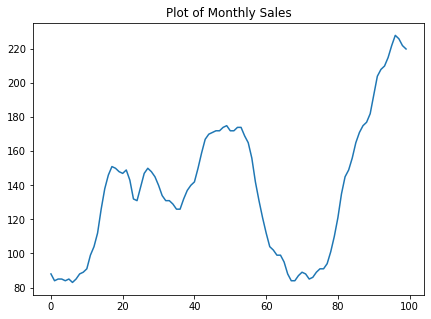

In [ ]:
#Create Plot
plt.figure(figsize = (7,5)) #This will set the figure size
plt.plot(df["Sales"])
plt.title("Plot of Monthly Sales")
plt.show()

In [ ]:
#Showing Increase Trend
#No Seasonality
#No Cyclic component
#Manual Analysis : Non-Stationary
#Statistical Test - Hypothesis Testing - adfuller test

## hypothesis testing

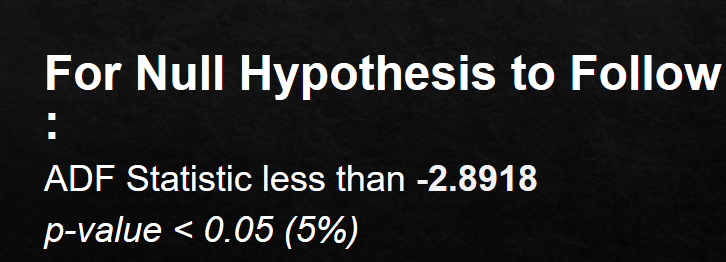

In [ ]:
df

Date  Sales
0   07-02-2020     88
1   07-03-2020     84
2   07-04-2020     85
3   07-05-2020     85
4   07-06-2020     84
..         ...    ...
95  10-05-2020    222
96  10-06-2020    228
97  10-07-2020    226
98  10-08-2020    222
99  10-09-2020    220

[100 rows x 2 columns]

In [ ]:
#Checking if the Series is Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Sales"])
print("ADF Statistic is :",result[0])
print("p-value is :",result[1])

ADF Statistic is : -2.4642397172033674
p-value is : 0.12441935447109487


In [ ]:
result

(-2.4642397172033674,
 0.12441935447109487,
 3,
 96,
 {'1%': -3.5003788874873405,
  '10%': -2.5830997960069446,
  '5%': -2.8921519665075235},
 444.6710409043255)

### Determine Order of Difference

##### Manual auto-correlation method

In [ ]:
# p-value is greatern than 0.05 -  the time-series is not a stationary.
# Perform Differencing to convert a Non-Stationary to a Stationary plot
# Determine Differencing based on Auto Correlation Plot

In [ ]:
df.shape

(100, 2)

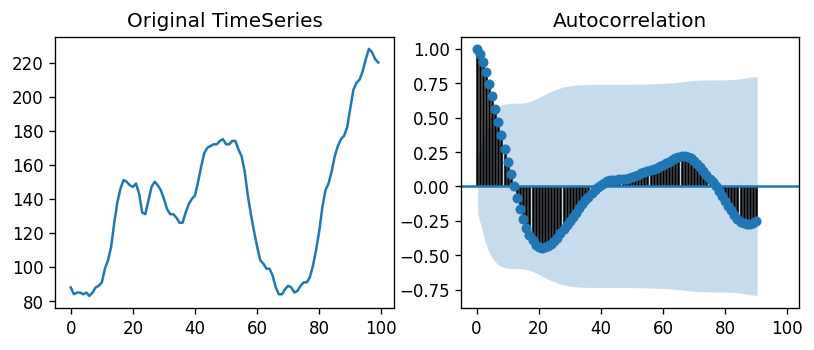

In [ ]:
#import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

#Figure & Axis
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':120})
fig,axes = plt.subplots(1,2,sharex = True)

#Original timeseries plot
axes[0].plot(df["Sales"])
axes[0].set_title("Original TimeSeries") 
plot_acf(df["Sales"],lags = 90,ax = axes[1]) #90 time lags
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
acf(df["Sales"],nlags=90)

array([ 1.        ,  0.96018011,  0.90113515,  0.82874638,  0.74598583,
        0.65724304,  0.56472186,  0.46856066,  0.37087797,  0.27417964,
        0.18085388,  0.09052872,  0.00213695, -0.08517373, -0.16705925,
       -0.23888993, -0.29903946, -0.34977533, -0.39272006, -0.42476725,
       -0.44285115, -0.44840287, -0.44318761, -0.43186762, -0.41746118,
       -0.39814979, -0.37211801, -0.34165176, -0.31040795, -0.28107658,
       -0.25190405, -0.22171229, -0.19048339, -0.15892139, -0.12789401,
       -0.0999955 , -0.07464708, -0.04986053, -0.02643312, -0.00452368,
        0.01304776,  0.02641376,  0.03716884,  0.04528242,  0.04879208,
        0.04942892,  0.05072488,  0.0527499 ,  0.05654896,  0.06250086,
        0.06959598,  0.07604082,  0.08489685,  0.09598779,  0.10604335,
        0.11420819,  0.12170762,  0.12854439,  0.13593825,  0.14559481,
        0.15716784,  0.16764942,  0.17805599,  0.19076971,  0.20479205,
        0.21632063,  0.2214912 ,  0.21982823,  0.21391438,  0.20

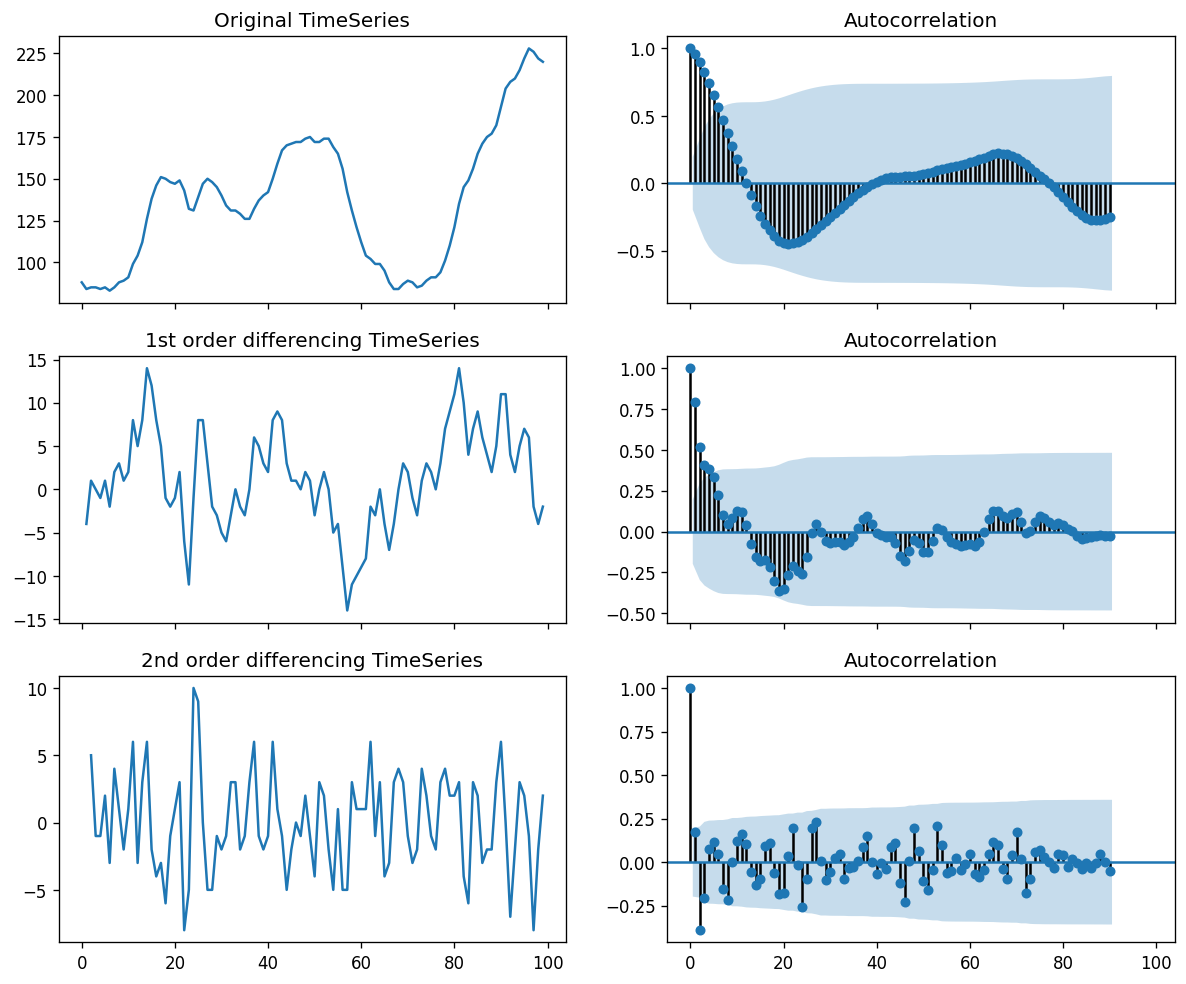

In [ ]:
#import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

#Figure & Axis
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})
fig,axes = plt.subplots(3,2,sharex = True)

#Original timeseries plot
axes[0,0].plot(df["Sales"])
axes[0,0].set_title("Original TimeSeries") 
plot_acf(df["Sales"],lags = 90,ax = axes[0,1]) #90 time lags


#1st Order differencing
axes[1,0].plot(df["Sales"].diff())
axes[1,0].set_title("1st order differencing TimeSeries")
plot_acf(df["Sales"].diff().dropna(),lags = 90,ax = axes[1,1])

#2nd Order Differencing
axes[2,0].plot(df["Sales"].diff().diff())
axes[2,0].set_title("2nd order differencing TimeSeries")
plot_acf(df["Sales"].diff().diff().dropna(),lags = 90,ax = axes[2,1])


plt.show()

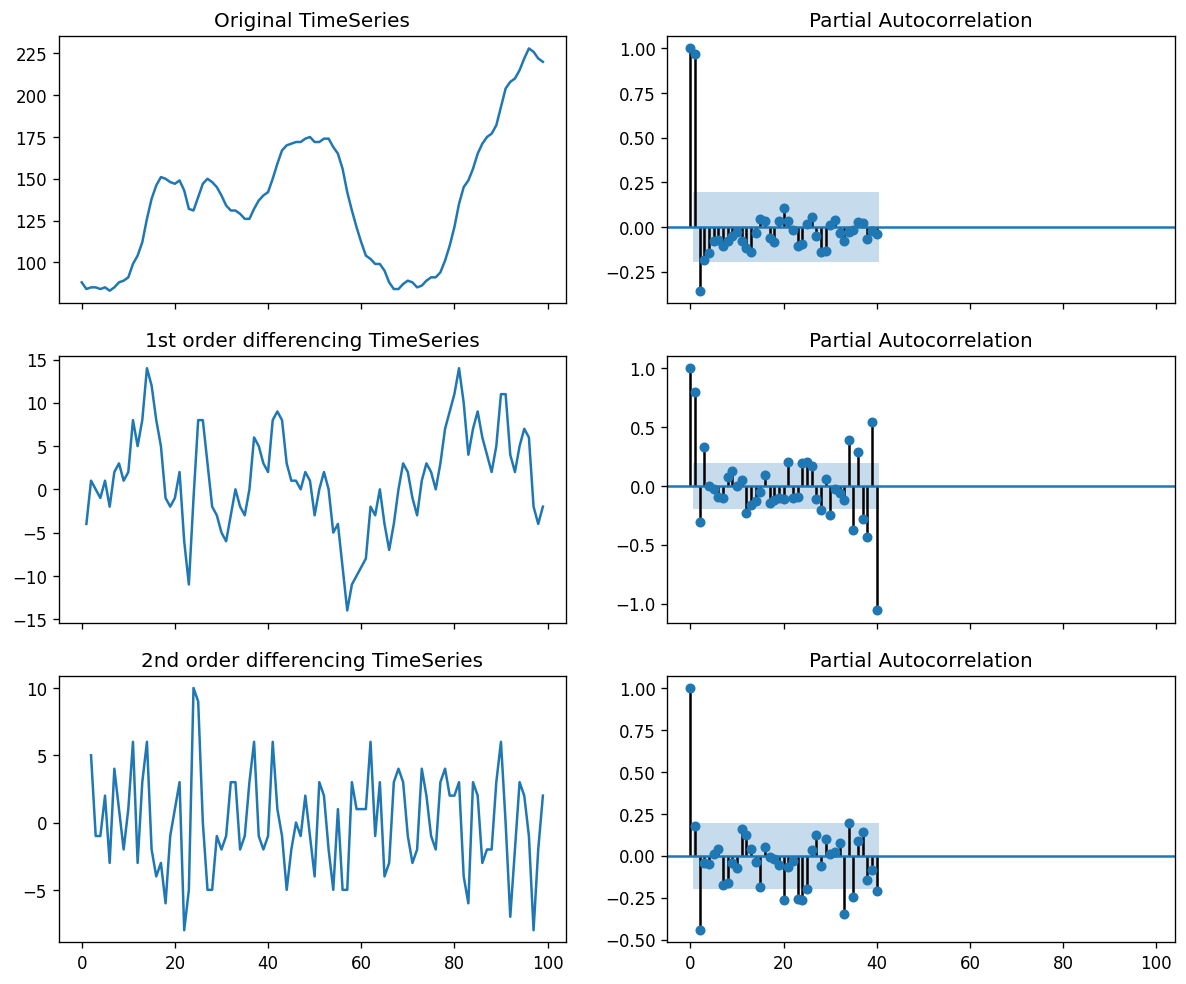

In [ ]:
#import plot_acf from statsmodels
from statsmodels.graphics.tsaplots import plot_pacf

#Figure & Axis
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})
fig,axes = plt.subplots(3,2,sharex = True)

#Original timeseries plot
axes[0,0].plot(df["Sales"])
axes[0,0].set_title("Original TimeSeries") 
plot_pacf(df["Sales"],lags=40,ax = axes[0,1]) #90 time lags


#1st Order differencing
axes[1,0].plot(df["Sales"].diff())
axes[1,0].set_title("1st order differencing TimeSeries")
plot_pacf(df["Sales"].diff().dropna(),lags=40,ax = axes[1,1])

#2nd Order Differencing
axes[2,0].plot(df["Sales"].diff().diff())
axes[2,0].set_title("2nd order differencing TimeSeries")
plot_pacf(df["Sales"].diff().diff().dropna(),lags=40,ax = axes[2,1])


plt.show()

##### Statistical Method for finding the order of difference

In [ ]:
#Statistical measure of Order of difference
# Use pmdarima

In [ ]:
!pip install pmdarima 

In [ ]:
#Verifying the difference
from pmdarima.arima.utils import ndiffs

In [ ]:
# 3 methods : kpss , adf and pp
y = df["Sales"]
#kpss
ndiffs(y,test = "kpss")

0

In [ ]:
#adf test
ndiffs(y,test = "adf")

2

In [ ]:
#pp test
ndiffs(y,test = "pp")

2

---

# ARIMA with Find terms 'p' and 'q'

In [ ]:
#Determine model Parameters
from pmdarima import auto_arima

In [ ]:
model = auto_arima(df["Sales"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -252.732
Date:                Sat, 10 Apr 2021   AIC                            511.465
Time:                        15:53:18   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056       0.459
ar.L2         -0.4407      0.087     -5.093      0.000      -0.610      -0.271
sigma2        10.1268      1.519      6.668      0.0

In [ ]:
#p = 2, d = 2 and q = 0
# Split the data
#perform split keeping time series intact
train = df.iloc[:85]
test = df.iloc[85:]
train.head()

Date  Sales
0  07-02-2020     88
1  07-03-2020     84
2  07-04-2020     85
3  07-05-2020     85
4  07-06-2020     84

In [ ]:
train.shape

(85, 2)

In [ ]:
model = auto_arima(train["Sales"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=447.705, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=451.549, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=451.463, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=447.707, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=449.662, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=441.862, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=439.922, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=441.881, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=438.156, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=449.569, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=440.125, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=440.111, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=445.820, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -216.078
Date:                Sat, 10 Apr 2021   AIC                            438.156
Time:                        15:54:54   BIC                            445.412
Sample:                             0   HQIC                           441.071
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2328      0.108      2.160      0.031       0.022       0.444
ar.L2         -0.3962      0.096     -4.138      0.000      -0.584      -0.209
sigma2        10.6372      1.823      5.835      0.0

In [ ]:
model.fit(train["Sales"])

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
len(test)

15

In [ ]:
forecast, confidence_interval = model.predict(n_periods = 15, return_conf_int = True, alpha=0.05)

In [ ]:
forecast

array([166.0759744 , 175.67939354, 183.95394262, 192.10633699,
       200.75685004, 209.57174429, 218.2275339 , 226.78114342,
       235.37400683, 244.01649831, 252.65499056, 261.2728867 ,
       269.8875721 , 278.50967108, 287.13476841])

In [ ]:
confidence_interval

array([[159.68359342, 172.46835537],
       [160.04020461, 191.31858248],
       [158.59093869, 209.31694655],
       [156.79885809, 227.41381589],
       [154.57453849, 246.93916159],
       [151.28981056, 267.85367803],
       [146.83720005, 289.61786775],
       [141.49996483, 312.062322  ],
       [135.46023141, 335.28778226],
       [128.70908203, 359.3239146 ],
       [121.21597507, 384.09400604],
       [113.01341566, 409.53235774],
       [104.15443884, 435.62070537],
       [ 94.66899882, 462.35034333],
       [ 84.56998636, 489.69955046]])

In [ ]:
test["forecast"] = forecast
test["lower_range"] = confidence_interval[:,0]
test["upper_range"] = confidence_interval[:,1]
test

Date  Sales    forecast  lower_range  upper_range
85   9/25/2020    165  166.075974   159.683593   172.468355
86   9/26/2020    171  175.679394   160.040205   191.318582
87   9/27/2020    175  183.953943   158.590939   209.316947
88   9/28/2020    177  192.106337   156.798858   227.413816
89   9/29/2020    182  200.756850   154.574538   246.939162
90   9/30/2020    193  209.571744   151.289811   267.853678
91  10-01-2020    204  218.227534   146.837200   289.617868
92  10-02-2020    208  226.781143   141.499965   312.062322
93  10-03-2020    210  235.374007   135.460231   335.287782
94  10-04-2020    215  244.016498   128.709082   359.323915
95  10-05-2020    222  252.654991   121.215975   384.094006
96  10-06-2020    228  261.272887   113.013416   409.532358
97  10-07-2020    226  269.887572   104.154439   435.620705
98  10-08-2020    222  278.509671    94.668999   462.350343
99  10-09-2020    220  287.134768    84.569986   489.699550

In [ ]:
#Create Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["Sales"], label='train data')
plt.plot(test["Sales"], label='actual')
plt.plot(test["forecast"], label='forecast')
plt.fill_between(test.index, test["lower_range"], test["upper_range"], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# MAPE - Mean Absolute Percentage Error
from pmdarima.metrics import smape

In [ ]:
mpe = smape(test["Sales"],test["forecast"])
print("MPE is :",mpe)

MPE is : 11.14992896960402


In [ ]:
#Model is 89% Accurate

# Project Completion - Generating forecast for next 30 days

In [ ]:
model = auto_arima(df["Sales"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

In [ ]:
#Lets print model summary to check the model parameters
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -252.732
Date:                Sat, 10 Apr 2021   AIC                            511.465
Time:                        16:00:11   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056       0.459
ar.L2         -0.4407      0.087     -5.093      0.000      -0.610      -0.271
sigma2        10.1268      1.519      6.668      0.0

In [ ]:
model.fit(df["Sales"])

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

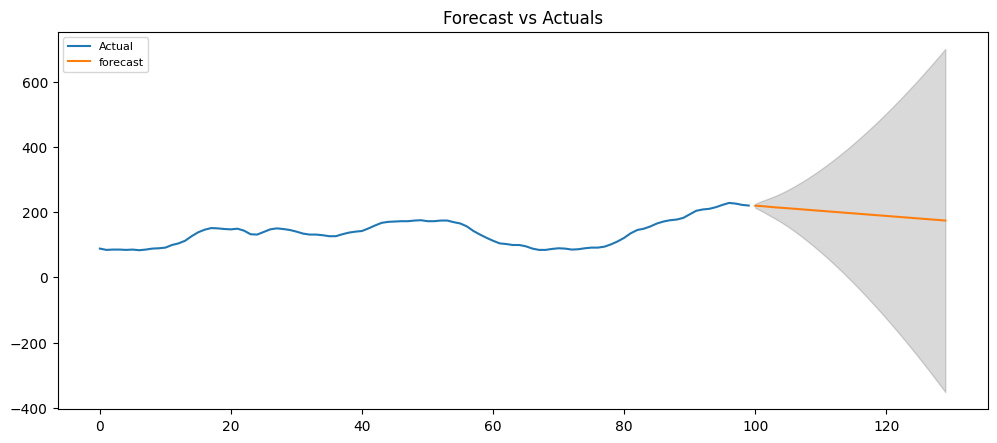

In [ ]:
forecast, confidence_interval = model.predict(n_periods = 30, return_conf_int = True, alpha=0.05)
predict = pd.DataFrame() #So this will create a blank dataframe, and then i will create the column for values
predict["forecast"] = forecast
predict["lower_range"] = confidence_interval[:,0]
predict["upper_range"] = confidence_interval[:,1]
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df["Sales"], label='Actual')
plt.plot(np.arange(100,130),predict["forecast"], label='forecast')
plt.fill_between(np.arange(100,130), predict["lower_range"], predict["upper_range"], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
predict

forecast  lower_range  upper_range
0   219.397177   213.160067   225.634288
1   218.273262   202.871198   233.675325
2   216.399224   191.476101   241.322346
3   214.561387   180.103049   249.019725
4   213.063466   168.227030   257.899903
5   211.637252   155.164915   268.109589
6   210.079727   140.950308   279.209147
7   208.456738   125.944829   290.968648
8   206.874736   110.302378   303.447094
9   205.332154    93.968291   316.696017
10  203.781675    76.903554   330.659796
11  202.211787    59.155845   345.267728
12  200.640373    40.786805   360.493941
13  199.077120    21.821658   376.332582
14  197.516644     2.266430   392.766858
15  195.953287   -17.865196   409.771771
16  194.387964   -38.551333   427.327261
17  192.823403   -59.772938   445.419745
18  191.259905   -81.516843   464.036654
19  189.696346  -103.771620   483.164312
20  188.132302  -126.524981   502.789585
21  186.568160  -149.764708   522.901029
22  185.004207  -173.479916   543.488330
23  183.440345  -197.660883   564.541573
24  181.876424  -222.298374   586.051222
25  180.312448  -247.383457   608.008352
26  178.748483  -272.907682   630.404647
27  177.184545  -298.863154   653.232245
28  175.620610  -325.242423   676.483643
29  174.056663  -352.038379   700.151705

In [ ]:
#export to csv
predict.to_csv("predictions.csv",index = False)